# title: "TP6 Tirages aléatoires- Fonctions-Graphes R"
## author: "Louai KASSA BAGHDOUCHE"
## date: "14/12/2020"

## Exercice 1 Fonctions, boucles simulation : Calcul de la valeur approchée de pi

Simulez n=100 observations de (X1,X2) suivant une loi uniforme dans le carré [0,1]x[0,1].
#### A.	Calcul de la valeur approchée de pi.
Parmi les 100 observations obtenues, on calcule combien sont dans le quart de disque de centre 0 et de rayon 1. Le rapport du nombre de points à l'intérieur du quart de disque  sur  le nombre de points total est une approximation de pi/4.
##### 1. Calculer ce nombre, et déduisez-en une approximation de pi 

In [6]:
x = runif(100, 0, 1)
x1 = runif(100, 0, 1)

points.int = x ^ 2 + x1 ^ 2 < 1; 
nomb.int = sum(points.int);
approximation.pi = 4 * (nomb.int / length(x1)); approximation.pi

[1] 3.16

##### 2.	Donner une illustration du résultat: un graphe représentant le carré, la courbe du quart de disque, les points à l’intérieur du quart de disque d’une couleur, ceux à l’extérieur d’une autre couleur.

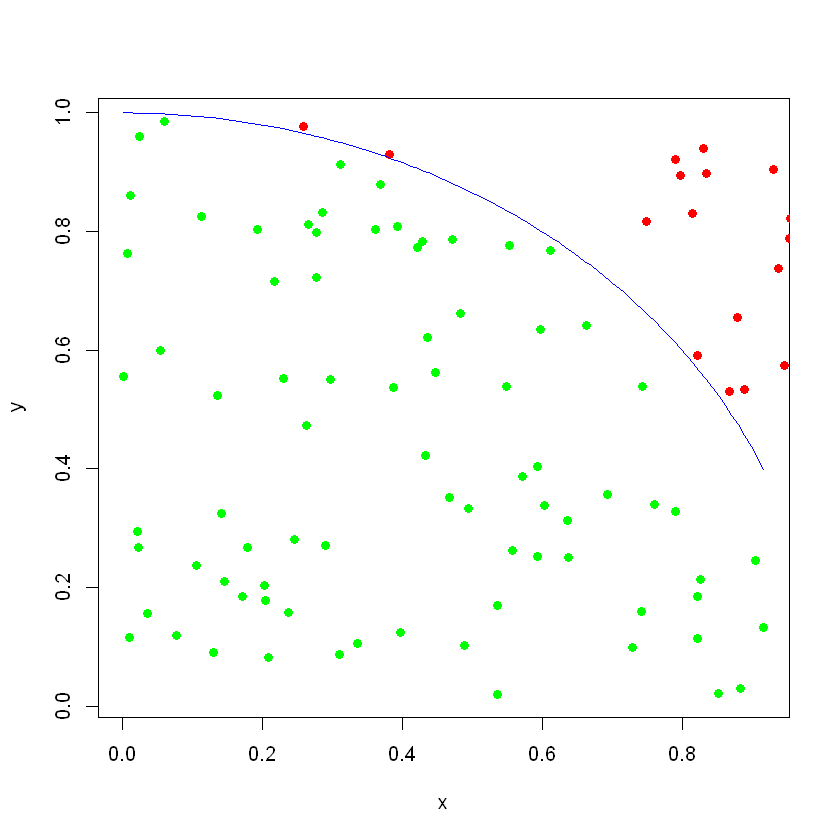

In [7]:
plot(x[points.int], x1[points.int], col='green', xlab='x', ylab='y', pch=16)
points(x[!points.int], x1[!points.int], col='red', pch=16)
curve(sqrt(1-x^2), add=TRUE, col='blue')

##### 3.	Rassembler tout le travail précédent dans une fonction Approximation.Pi() prenant en paramètre le nombre n, et renvoyant le graphe obtenu ainsi que l’approximation de pi correspondante.

In [8]:
approximation.Pi = function(n) {
    
    x = runif(x, 0, 1);
    y = runif(x, 0, 1);
    int = x ^ 2 + y ^ 2 < 1;
    
    # présentation graphique 
    
    plot(x[int], y[int], col='green', xlab='x', ylab='y', pch=16)
    points(x[!int], y[!int], col='red', pch=16)
    curve(sqrt(1-x^2), add=TRUE, col='blue')
    
    # calcul de l'approximation de pi
    
    return (4 * (sum(int) / length(x1)));
}

[1] 2.92

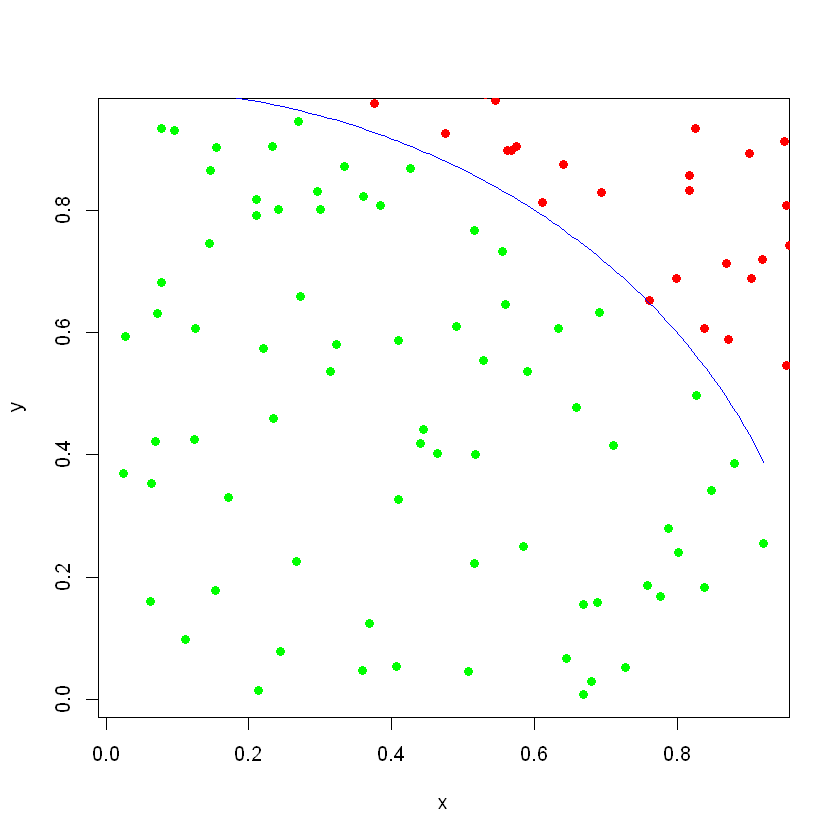

In [9]:
approximation.Pi(100)

##### 4.	Donner une fonction Distribution.Pi() qui prend en paramètre le nombre n, ainsi qu’un nombre p (nombre de tirages) et renvoie la distribution des p valeurs de pi obtenues, ainsi que les paramètres principaux de cette distribution. On pourra commencer par définir une fonction App.Pi() qui fait la même chose que Approximation.Pi() sans la partie graphique.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  30.52   30.64   30.80   31.18   31.88   32.08 

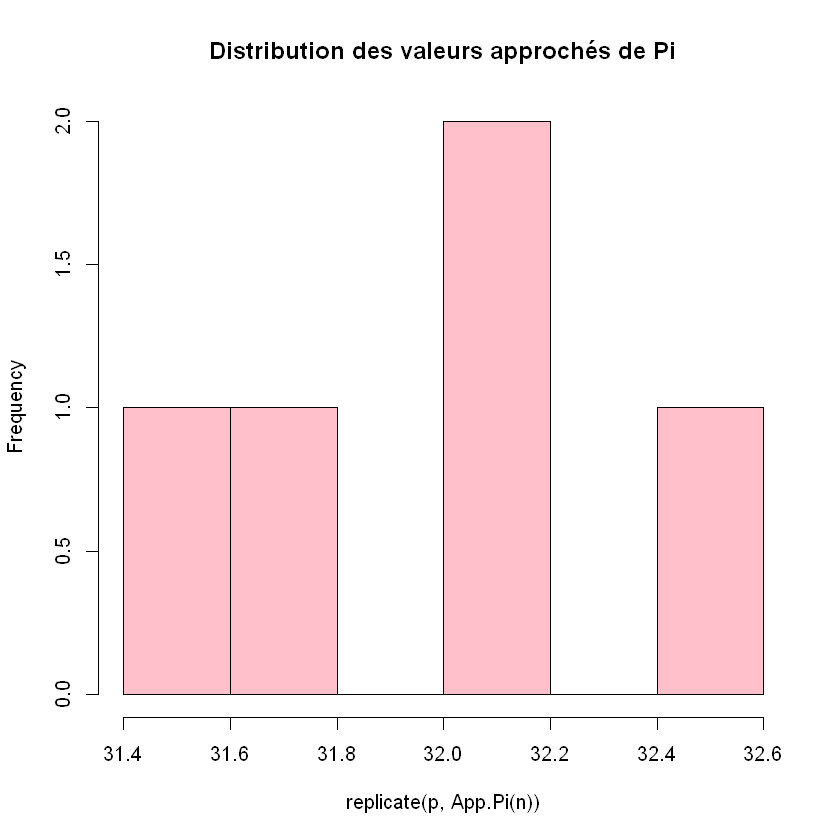

In [10]:
App.Pi <- function(n) {
    
    x = runif(n, 0, 1);
    y = runif(n, 0, 1);
    int = x ^ 2 + y ^ 2 < 1;
    
    # calcul de l'approximation de pi
    
    return (4 * (sum(int) / length(x1)));
}

Distribution.Pi <- function(n,p){
  hist(replicate(p, App.Pi(n)), col="pink",
       main="Distribution des valeurs approchés de Pi",
      )
  summary(replicate(p, App.Pi(n)))
}

Distribution.Pi(1000, 5)

## Exercice 2: Estimation d’une probabilité.

Commentaire : le même type de simulation permet de donner des valeurs approximatives d’une probabilité, voire de toutes les valeurs d’une loi de probabilité…
On considère toujours notre carré carré [0,1]x[0,1], muni de ses quatre cotés.
On considère la variable aléatoire X: distance au coté le plus proche.
1. Donner une approximation de la probabilité que la distance du point au coté le plus proche soit inférieure à d=0,25. Créer une fonction Cote(), qui prend comme argument n,d.


In [11]:
count <- function(n, d) {

    # création des lois uniformes
    x <- runif(n, 0, 1)
    y <- runif(n, 0, 1)
    
    # calcul de la distance inférieur à 1/4
    dist <- pmin(x, 1-x, y, 1-y) < d
    plot(x[dist], y[dist], col='green', pch=16, xlab='X', ylab='Y', main='Distance du points au côté le plus proche')
    points(x[!dist], y[!dist], col='red', pch=16)
    
    # calcul de la probabilité
    return (sum(dist)/length(x))
}

[1] 0.3531111

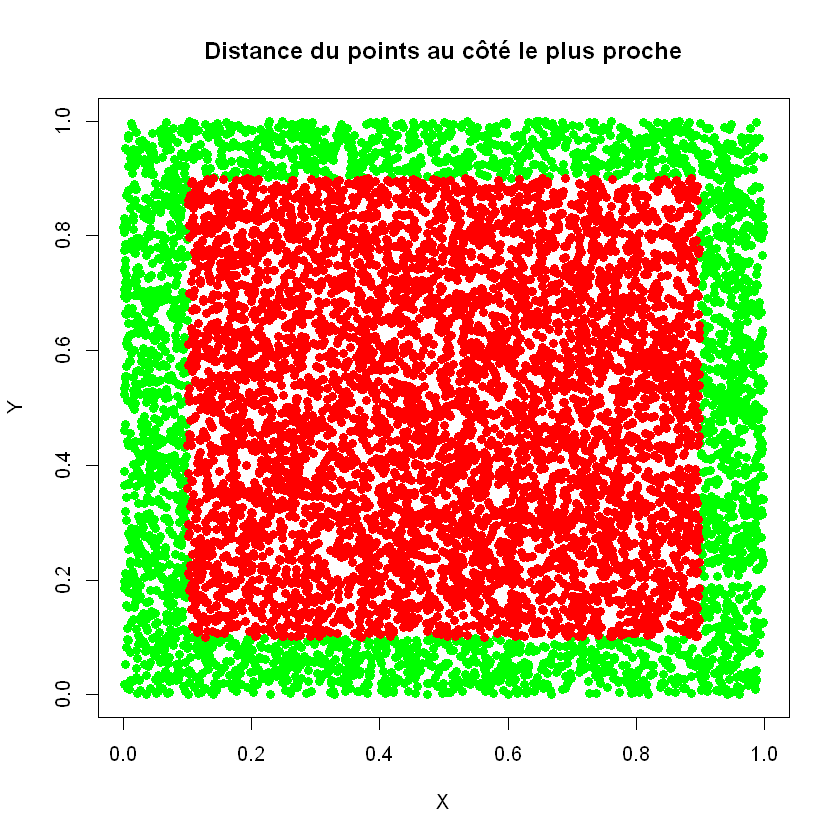

In [12]:
count(9000, 0.1)

3. Identifier la loi théorique de la différence au coté le plus proche : espérence, variance, densité

Théoriquement parlant la loi au côté le plus proche se définit par **P(x<=d) = (aire des côtés/aire totale)**. On générale la surface totale du carré avec d est $$(\frac{1}d)^2$$ Par contre l'aire des côtés est $$(1/d)^2 - (1/d - 2)^2$$
Du coup $$P(x <= d) = ((\frac{1}d)^2 - (\frac{1}d - 2)^2) / (\frac{1}d)^2$$ on développe pour obtenir finalement $$P(x <= d) = 4d - 4d^2\$$
Par exemple P(x <= 0.25) = 4 * 0.25 - 4 * (0.25)^2 = 0.75
On sait que P(x <= d) = F(X) qu'il s'agit d'une fonction de répartition. 
Du coup, **f(d) = 4 - 8d**. 

La détermination de l'éspérence dont la formule pour une variable continue est: $$E(X) = \int x f(x) dx $$